- DATA LOADING AND INITIAL INSPECTION

In [1]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

patient_data = pd.read_csv('Patient_Health_Data.csv')

In [2]:
patient_data.info() #diplays basic info like count of non-null values and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     1915 non-null   float64
 2   Weight_kg                     1914 non-null   float64
 3   Blood_Pressure                1640 non-null   object 
 4   Temperature_C                 1892 non-null   float64
 5   Heart_Rate                    1903 non-null   float64
 6   Symptoms                      1562 non-null   object 
 7   Existing_Conditions           1488 non-null   object 
 8   Disease_Predictions           1488 non-null   object 
 9   Laboratory_Test_Results       1505 non-null   object 
 10  Cholesterol_mg_dL             1899 non-null   float64
 11  Blood_Sugar_mg_dL             1880 non-null   float64
 12  Family_History_Heart_Disease  1891 non-null   object 
 13  Smo

In [3]:
patient_data.head() #displays first 5 rows

,Patient_ID,Height_cm,Weight_kg,Blood_Pressure,Temperature_C,Heart_Rate,Symptoms,Existing_Conditions,Disease_Predictions,Laboratory_Test_Results,Cholesterol_mg_dL,Blood_Sugar_mg_dL,Family_History_Heart_Disease,Smoking_Status
0,P0001,174.0,59.0,120/80,36.6,63.0,chest pain,Diabetes,Heart Disease,High Cholesterol,198.0,79.0,Yes,Never
1,P0002,NaN,67.0,130/85,37.0,68.0,shortness of breath,Hypertension,Coronary Artery Disease,NaN,179.0,90.0,No,Former
2,P0003,176.0,58.0,140/90,37.0,65.0,fatigue,High Cholesterol,Arrhythmia,Normal,193.0,82.0,NaN,Current
3,P0004,185.0,65.0,125/82,37.2,69.0,dizziness,NaN,NaN,NaN,228.0,103.0,No,Never
4,P0005,167.0,41.0,135/88,36.3,72.0,palpitations,Asthma,Hypertension,NaN,251.0,135.0,Yes,Former


In [4]:
patient_data.tail() #displays last 5 rows

,Patient_ID,Height_cm,Weight_kg,Blood_Pressure,Temperature_C,Heart_Rate,Symptoms,Existing_Conditions,Disease_Predictions,Laboratory_Test_Results,Cholesterol_mg_dL,Blood_Sugar_mg_dL,Family_History_Heart_Disease,Smoking_Status
1995,P1996,180.0,70.0,120/80,37.1,97.0,chest pain,NaN,Stroke,High Cholesterol,252.0,64.0,NaN,Never
1996,P1997,169.0,38.0,130/85,37.6,78.0,NaN,Asthma,Hypertension,High Blood Sugar,120.0,97.0,Yes,Former
1997,P1998,161.0,65.0,140/90,NaN,66.0,fatigue,Thyroid,NaN,Normal,171.0,125.0,No,Current
1998,P1999,168.0,94.0,125/82,37.2,91.0,dizziness,Diabetes,Heart Disease,Low Iron,219.0,96.0,Yes,Never
1999,P2000,162.0,75.0,135/88,36.4,95.0,palpitations,Hypertension,Coronary Artery Disease,NaN,225.0,71.0,No,Former


- DATA CLEANING

In [5]:
#Fill missing numeric values with mean

numeric_columns = patient_data.select_dtypes(include=[np.number]).columns
patient_data[numeric_columns] = patient_data[numeric_columns].fillna(patient_data[numeric_columns].mean())
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     2000 non-null   float64
 2   Weight_kg                     2000 non-null   float64
 3   Blood_Pressure                1640 non-null   object 
 4   Temperature_C                 2000 non-null   float64
 5   Heart_Rate                    2000 non-null   float64
 6   Symptoms                      1562 non-null   object 
 7   Existing_Conditions           1488 non-null   object 
 8   Disease_Predictions           1488 non-null   object 
 9   Laboratory_Test_Results       1505 non-null   object 
 10  Cholesterol_mg_dL             2000 non-null   float64
 11  Blood_Sugar_mg_dL             2000 non-null   float64
 12  Family_History_Heart_Disease  1891 non-null   object 
 13  Smo

In [6]:
#Fill categorical columns with a placeholder "Unknown" for missing data

categorical_columns = patient_data.select_dtypes(include=['object']).columns
patient_data[categorical_columns] = patient_data[categorical_columns].fillna("Unknown")
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    2000 non-null   object 
 1   Height_cm                     2000 non-null   float64
 2   Weight_kg                     2000 non-null   float64
 3   Blood_Pressure                2000 non-null   object 
 4   Temperature_C                 2000 non-null   float64
 5   Heart_Rate                    2000 non-null   float64
 6   Symptoms                      2000 non-null   object 
 7   Existing_Conditions           2000 non-null   object 
 8   Disease_Predictions           2000 non-null   object 
 9   Laboratory_Test_Results       2000 non-null   object 
 10  Cholesterol_mg_dL             2000 non-null   float64
 11  Blood_Sugar_mg_dL             2000 non-null   float64
 12  Family_History_Heart_Disease  2000 non-null   object 
 13  Smo

In [7]:
#Change Datatypes

patient_data['Patient_ID'] = patient_data['Patient_ID'].astype(str)

In [8]:
#Separating systolic and diastolic blood pressure from 'Blood_Pressure' column

bp_split = patient_data['Blood_Pressure'].str.split('/', expand=True)
patient_data['Systolic_BP'] = pd.to_numeric(bp_split[0], errors='coerce')
patient_data['Diastolic_BP'] = pd.to_numeric(bp_split[1], errors='coerce')

- DEALING WITH OUTLIERS (DATA VALIDATION)

In [9]:
# Q1 = patient_data[numeric_columns].quantile(0.25)
# Q3 = patient_data[numeric_columns].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = ((patient_data[numeric_columns] < lower_bound) | (patient_data[numeric_columns] > upper_bound)).sum()
# print("\nOutliers in Columns:\n", outliers)

In [10]:
# patient_data = patient_data[~((patient_data[numeric_columns] < lower_bound) | (patient_data[numeric_columns] > upper_bound)).any(axis=1)]

In [11]:
# duplicates = patient_data.duplicated().sum()
# print("\nNumber of Duplicate Rows:", duplicates)

# patient_data = patient_data.drop_duplicates()

- EXPLORATORY DATA ANALYSIS

In [12]:
patient_data.describe()

,Height_cm,Weight_kg,Temperature_C,Heart_Rate,Cholesterol_mg_dL,Blood_Sugar_mg_dL,Systolic_BP,Diastolic_BP
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1640.000000,1640.000000
mean,169.902350,69.388715,36.970983,74.567525,199.612954,99.007447,132.460366,86.150610
std,9.631446,14.720419,0.483762,10.072004,38.445042,29.039776,8.499270,4.243058
min,137.000000,24.000000,35.400000,38.000000,43.000000,-1.000000,120.000000,80.000000
25%,164.000000,60.000000,36.700000,68.000000,175.750000,81.000000,125.000000,82.000000
50%,169.902350,69.388715,36.970983,74.567525,199.612954,99.007447,132.500000,86.500000
75%,176.000000,79.000000,37.300000,81.000000,225.000000,117.250000,140.000000,90.000000
max,208.000000,128.000000,38.600000,110.000000,335.000000,201.000000,145.000000,92.000000


In [13]:
patient_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_cm,2000.0,169.902350,9.631446,137.0,164.00,169.902350,176.00,208.0
Weight_kg,2000.0,69.388715,14.720419,24.0,60.00,69.388715,79.00,128.0
Temperature_C,2000.0,36.970983,0.483762,35.4,36.70,36.970983,37.30,38.6
Heart_Rate,2000.0,74.567525,10.072004,38.0,68.00,74.567525,81.00,110.0
Cholesterol_mg_dL,2000.0,199.612954,38.445042,43.0,175.75,199.612954,225.00,335.0
Blood_Sugar_mg_dL,2000.0,99.007447,29.039776,-1.0,81.00,99.007447,117.25,201.0
Systolic_BP,1640.0,132.460366,8.499270,120.0,125.00,132.500000,140.00,145.0
Diastolic_BP,1640.0,86.150610,4.243058,80.0,82.00,86.500000,90.00,92.0


In [14]:
# find avg blood sugar by their smoking status

average_blood_sugar_by_smoking = patient_data.groupby('Smoking_Status')['Blood_Sugar_mg_dL'].mean()
print(average_blood_sugar_by_smoking)

Smoking_Status
Current     99.222340
Former      97.418038
Never      100.596673
Unknown     97.517021
Name: Blood_Sugar_mg_dL, dtype: float64


In [15]:
#fing correlation of the data

numeric_data = patient_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


                   Height_cm  Weight_kg  Temperature_C  Heart_Rate  \
Height_cm           1.000000  -0.024574      -0.002071    0.010591   
Weight_kg          -0.024574   1.000000       0.047130   -0.015947   
Temperature_C      -0.002071   0.047130       1.000000    0.023528   
Heart_Rate          0.010591  -0.015947       0.023528    1.000000   
Cholesterol_mg_dL   0.009546  -0.029408      -0.025888   -0.006051   
Blood_Sugar_mg_dL   0.004192  -0.003803      -0.006292    0.002262   
Systolic_BP        -0.030434   0.015926       0.018030    0.028735   
Diastolic_BP       -0.034366   0.015732       0.016875    0.030079   

                   Cholesterol_mg_dL  Blood_Sugar_mg_dL  Systolic_BP  \
Height_cm                   0.009546           0.004192    -0.030434   
Weight_kg                  -0.029408          -0.003803     0.015926   
Temperature_C              -0.025888          -0.006292     0.018030   
Heart_Rate                 -0.006051           0.002262     0.028735   
Cholester

- DATA VISUALIZATION

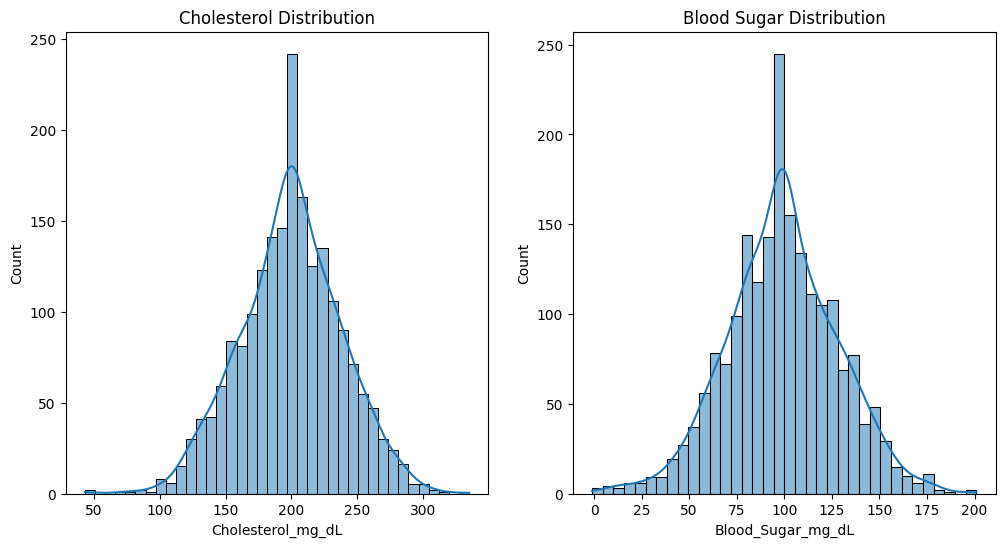

In [16]:
# Histogram for Cholesterol and Blood Sugar
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(patient_data['Cholesterol_mg_dL'], kde=True)
plt.title("Cholesterol Distribution")

plt.subplot(1, 2, 2)
sns.histplot(patient_data['Blood_Sugar_mg_dL'], kde=True)
plt.title("Blood Sugar Distribution")
plt.show()

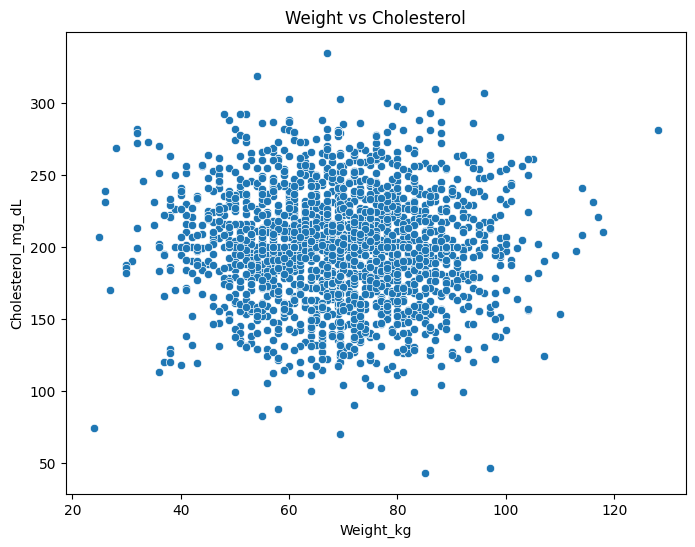

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Weight_kg', y='Cholesterol_mg_dL', data=patient_data)
plt.title('Weight vs Cholesterol')
plt.show()

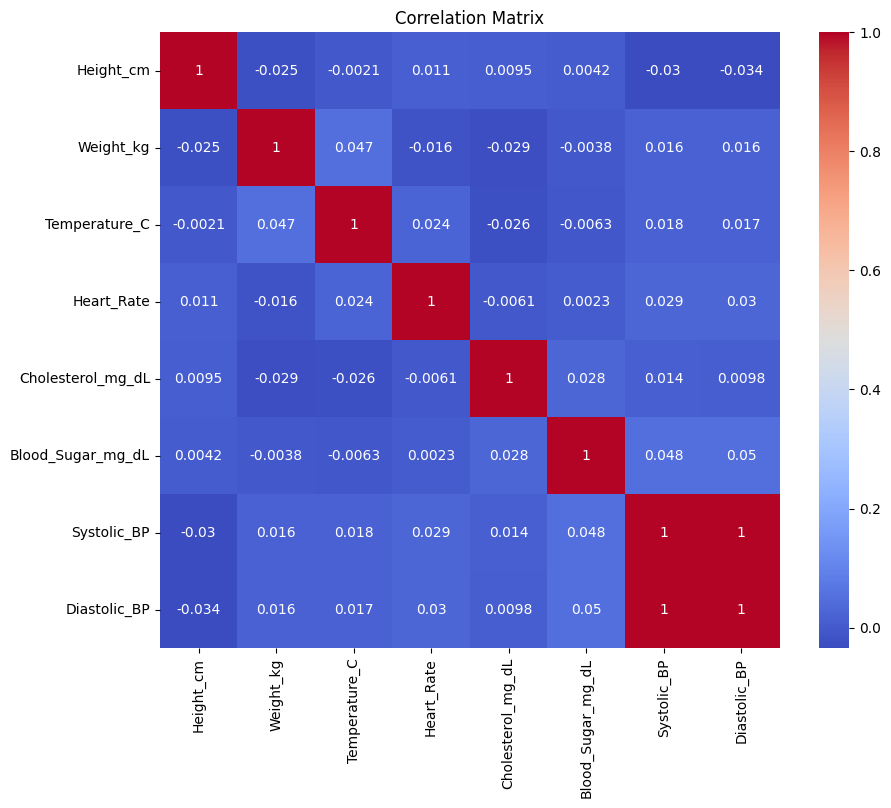

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot= True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

- FEATURE ENGINEERING

In [19]:
patient_data['BMI'] = patient_data['Weight_kg'] / (patient_data['Height_cm'] / 100) ** 2
print(patient_data['BMI'])

0       19.487383
1       23.210048
2       18.724174
3       18.991965
4       14.701137
          ...    
1995    21.604938
1996    13.304856
1997    25.076193
1998    33.304989
1999    28.577961
Name: BMI, Length: 2000, dtype: float64


In [20]:
patient_data['Smoking_Status'] = patient_data['Smoking_Status'].map({"Never": 0, "Current": 1, "Former": 2, "Unknown": -1})
patient_data['Family_History_Heart_Disease'] = patient_data['Family_History_Heart_Disease'].map({"Yes":1, "No": 2,"Unknown": -1})

In [21]:
patient_data.to_csv('Modified_Patient_Health_Data.csv', index=False)

- TRAINING THE MODEL WITH THE HELP OF K-NEAREST NEIGHBOUR

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

KeyboardInterrupt: 

In [1026]:
label_encoders = {}
X = patient_data.drop(columns=['Disease_Predictions'])
y = patient_data['Disease_Predictions']

for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

In [1027]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [1028]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1029]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [1030]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [1031]:
if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):
    print("X_train contains invalid values.")
    
if pd.isna(y_train).any():
    print("y_train contains invalid values.")

In [1032]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [1033]:
param_grid = {
    'n_neighbors': range(3, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(3, 15),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [1034]:
X_train = pd.DataFrame(X_train).fillna(X_train.mean())
X_test = pd.DataFrame(X_test).fillna(X_train.mean())

In [1035]:
X_train = pd.DataFrame(X_train).fillna(X_train.mode().iloc[0])
X_test = pd.DataFrame(X_test).fillna(X_train.mode().iloc[0])

In [1036]:
knn = grid_search.best_estimator_
y_pred = knn.predict(X_test)

In [1037]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel AccuracY: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model AccuracY: 83.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86        59
           1       0.87      0.92      0.89        59
           2       0.79      0.93      0.85        60
           3       0.88      0.87      0.88        61
           4       0.87      0.81      0.84        59
           5       0.79      0.67      0.72       102

    accuracy                           0.83       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.83      0.83      0.83       400



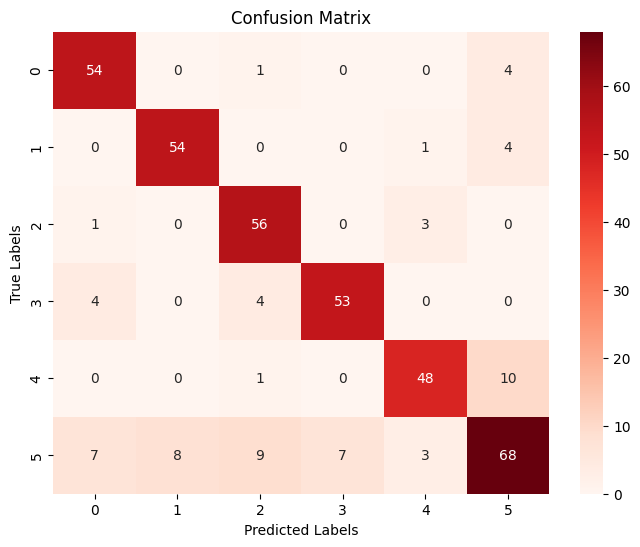

In [1038]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

SAVING THE TRAINED MODEL

In [1039]:
import joblib
joblib.dump(knn, 'My Knn Model.pkl')

['My Knn Model.pkl']

In [1040]:
patient_data.head()

,Patient_ID,Height_cm,Weight_kg,Blood_Pressure,Temperature_C,Heart_Rate,Symptoms,Existing_Conditions,Disease_Predictions,Laboratory_Test_Results,Cholesterol_mg_dL,Blood_Sugar_mg_dL,Family_History_Heart_Disease,Smoking_Status,Systolic_BP,Diastolic_BP,BMI
0,P0001,174.00000,59.0,120/80,36.6,63.0,chest pain,Diabetes,Heart Disease,High Cholesterol,198.0,79.0,1,0,120.0,80.0,19.487383
1,P0002,169.90235,67.0,130/85,37.0,68.0,shortness of breath,Hypertension,Coronary Artery Disease,Unknown,179.0,90.0,2,2,130.0,85.0,23.210048
2,P0003,176.00000,58.0,140/90,37.0,65.0,fatigue,High Cholesterol,Arrhythmia,Normal,193.0,82.0,-1,1,140.0,90.0,18.724174
3,P0004,185.00000,65.0,125/82,37.2,69.0,dizziness,Unknown,Unknown,Unknown,228.0,103.0,2,0,125.0,82.0,18.991965
4,P0005,167.00000,41.0,135/88,36.3,72.0,palpitations,Asthma,Hypertension,Unknown,251.0,135.0,1,2,135.0,88.0,14.701137
